# Machine Learning Pipeline for Mortgage Backed Securities Prepayment Risk

## The LoanExport data consists of 291451 rows and 28 columns. The columns of the dataset are explained below:

### 0   CreditScore :                     Credit score of the client 
###  1   FirstPaymentDate  :         First payment date of the customer
###  2   FirstTimeHomebuyer :     If the customer is first time home buyer 
###  3   MaturityDate   :                 Maturity date of the customer 
###  4   MSA  :                                Mortgage security amount
###  5   MIP   :                                Mortgage insurance percentage  
###  6   Units  :            Number of units  
###  7   Occupancy  :        Occupancy status at the time the loan
###  8   OCLTV  :            Original Combined Loan-to-Value 
###  9   DTI  :              Debt to income ratio 
###  10  OrigUPB  :          Original unpaid principal balance
###  11  LTV   :          Loan-to-Value 
###  12  OrigInterestRate :   Original interest rate
###  13  Channel  :           The origination channel used by the party
###  14  PPM  :               Prepayment penalty mortgage
###  15  ProductType  :       Type of product 
###  16  PropertyState  :     State in which the property is located 
###  17  PropertyType :       Property type 
###  18  PostalCode  :        Postal code of the property
###  19  LoanSeqNum  :        Loan number
###  20  LoanPurpose   :      Purpose of the loan
###  21  OrigLoanTerm  :      Original term of the loan 
###  22  NumBorrowers :       Number of borrowers 
###  23  SellerName  :        Name of seller
###  24  ServicerName  :      Name of the service used
###  25  EverDelinquent  :    If the loan was ever delinquent  
###  26  MonthsDelinquent  :  Months of delinquent  
###  27  MonthsInRepayment :  Months in repayment

## Importing libraries and data. We will do basic analysis of data.

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import xlrd
#warning hadle
import warnings# warning filter
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
#Read files:
data = pd.read_csv("LoanExport.csv", header= 0)
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [4]:
data.shape

(291451, 28)

In [5]:
data.describe(include= "all")

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451,291451.000000,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451,291451,291451,291451,291451,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,3,1,53,7,1767,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,T,N,FRM,CA,SF,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,184154,NaN,39100,NaN,NaN,276131,NaN,NaN,NaN,NaN,NaN,167670,282125,291451,43327,244923,2582,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
mean,708.936991,199904.760553,NaN,202902.367043,NaN,9.216685,1.026022,NaN,76.960529,30.033453,124940.387921,76.937986,6.926547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,13.821228,NaN,16.090508,NaN,12.648273,0.202986,NaN,15.236154,13.203974,53657.440624,15.225298,0.343541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,8000.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,83000.000000,70.000000,6.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,117000.000000,80.000000,6.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,160000.000000,90.000000,7.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


## There are no duplicates in data, but there are some null values.

In [6]:
# Checking duplicate rows
len(data[data.duplicated()])

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [8]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

## we know that seller type is not an important column for further analysis, so for the time being we can replace missing values as others (O) as we will drop the column later.

In [9]:
data['SellerName']=data['SellerName'].replace(np.nan,'O')

## We will convert the dates in  data into date types

In [10]:
# Convert FirstPaymentDate ' and 'MaturityDate' columns to datetime format
data['Year']=pd.to_datetime(data['FirstPaymentDate'], format='%Y%M').dt.strftime('%Y')
data['FirstPaymentDate'] = pd.to_datetime(data['FirstPaymentDate'], format='%Y%M').dt.strftime('%m/%Y')
data['MaturityDate'] = pd.to_datetime(data['MaturityDate'], format='%Y%M').dt.strftime('%m/%Y')

# Verify the changes
print(data[['FirstPaymentDate', 'MaturityDate']])

       FirstPaymentDate MaturityDate
0               01/1999      01/2029
1               01/1999      01/2029
2               01/1999      01/2029
3               01/1999      01/2029
4               01/1999      01/2029
...                 ...          ...
291446          01/1999      01/2029
291447          01/2002      01/2029
291448          01/2003      01/2029
291449          01/1999      01/2029
291450          01/1999      01/2029

[291451 rows x 2 columns]


## We check for unique values in each column

In [11]:
# check unique values in dataset
data.apply(lambda x: (x.unique()))

CreditScore           [0, 335, 342, 363, 366, 370, 375, 391, 396, 44...
FirstPaymentDate      [01/1999, 01/2000, 01/2001, 01/2002, 01/2003, ...
FirstTimeHomebuyer                                            [N, X, Y]
MaturityDate          [01/2029, 01/2027, 01/2024, 01/2026, 01/2030, ...
MSA                   [16974, 19740, 29940, 31084, 35644, X    , 367...
MIP                   [25, 0, 30, 12, 35, 29, 17, 18, 20, 22, 6, 14,...
Units                                                   [1, 2, 4, 3, 0]
Occupancy                                                     [O, I, S]
OCLTV                 [89, 73, 75, 76, 78, 90, 72, 95, 80, 77, 85, 9...
DTI                   [27, 17, 16, 14, 18, 40, 21, 20, 38, 19, 23, 4...
OrigUPB               [117000, 109000, 88000, 160000, 207000, 111000...
LTV                   [89, 73, 75, 76, 78, 90, 72, 95, 80, 77, 85, 9...
OrigInterestRate      [6.75, 6.5, 6.875, 7.125, 7.0, 7.25, 6.625, 7....
Channel                                                    [T, R

## We can observe that some data are not provided and is marked as X

In [12]:
count = (data.astype(str).applymap(str.strip) == "X").sum()

print(count)


CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer    78015
MaturityDate              0
MSA                   39100
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                    5405
ProductType               0
PropertyState             0
PropertyType             22
PostalCode                6
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            339
SellerName                0
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
Year                      0
dtype: int64


## We will change X values of NumBorrowers by its mode "2" and PropertyType by SF

In [13]:
data.drop(data[data['NumBorrowers'] == 'X '].index, inplace=True)

In [14]:
data['PropertyType'].replace('X ', 'SF', inplace=True)

## First we will change X in the FirstTimeHomebuyer column to 'Y'  meaning we will consider it as first time buyers.

In [15]:
c= ((data['FirstTimeHomebuyer'].value_counts()))
print(c)

N    183988
X     77850
Y     29274
Name: FirstTimeHomebuyer, dtype: int64


In [16]:
data.drop(data[data['FirstTimeHomebuyer'] == 'X'].index, inplace=True)

## We do not need column  PostalCode  for further analysis as we can use propertystate instead

In [17]:
data.drop(['PostalCode','ProductType','LoanSeqNum'], axis=1, inplace=True)


## We will delete the rows with X in the columns 'MSA' and 'PPM' to clean data. We cannot use imputation method here as it will affect the integrity of the data.

In [18]:
data = data[(data[['MSA','PPM']].apply(lambda x: x.str.strip()) != 'X').all(axis=1)]
count = (data.astype(str).applymap(str.strip) == "X").sum()
print(count)


CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
PropertyState         0
PropertyType          0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
Year                  0
dtype: int64


In [19]:
data['MSA']=data['MSA'].astype(int)

## There are only two rows with date 2011 and 2013. We can remove this as it affects our analysis.

In [20]:
data=data[data['FirstPaymentDate'] < '01/2011']

In [21]:
data.shape

(181684, 26)

## We will also remove null values

In [22]:
data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
PropertyState         0
PropertyType          0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
Year                  0
dtype: int64

In [23]:
data.dropna(inplace=True)

data.shape


(181684, 26)

# Exploratory Data Analysis

## We set our target variable as EverDelinquent and do our analysis based on that. Before that we will be creating some new columns that will help in our analysis. 

## We will create a band for CreditScores. THe more the credit scores are the better for the bank.

In [24]:
data['CreditScore'] = data['CreditScore'].replace(0, 850)

In [25]:
print('min',data['CreditScore'].min())
print('max',data['CreditScore'].max())
print('mean',data['CreditScore'].mean())

min 335
max 850
mean 712.762263050131


In [26]:
data.CreditScore.unique()

array([850, 335, 342, 366, 375, 396, 466, 471, 477, 479, 482, 483, 486,
       487, 489, 490, 491, 492, 494, 495, 496, 498, 499, 500, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516,
       517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
       530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
       543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555,
       556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568,
       569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581,
       582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594,
       595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607,
       608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620,
       621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633,
       634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646,
       647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 65

## We made a CreditScoreRange column and found that there is nan value which we removed.

In [27]:
# Create a new column 'CreditScoreRange' by cutting the CreditScore column into bands
data['CreditScoreRange'] =  pd.cut(data.CreditScore,[550,650,700,750,1e6],4,labels=[1,2,3,4])
print('Is there a Null value in CreditScoreRange?', data['CreditScoreRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['CreditScoreRange'].value_counts()

Is there a Null value in CreditScoreRange? True
Dataframe shape: (181684, 27)


3    62051
4    49056
2    46297
1    23846
Name: CreditScoreRange, dtype: int64

In [28]:
data = data[data['CreditScoreRange'].notna()]
print('Is there a Null value in CreditScoreRange?', data['CreditScoreRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['CreditScoreRange'].value_counts()

Is there a Null value in CreditScoreRange? False
Dataframe shape: (181250, 27)


3    62051
4    49056
2    46297
1    23846
Name: CreditScoreRange, dtype: int64

## We will first convert FirstPaymentMonth and MaturityMonth columns and also create a Loan Duration column ( Loan Duration had to be maximum 20 but there is some error in data so we will make it to 20.

In [29]:
data['FirstPaymentMonth'] = pd.to_datetime(data['FirstPaymentDate'], format='%m/%Y').dt.strftime('%m')
data['MaturityMonth'] = pd.to_datetime(data['MaturityDate'], format='%m/%Y').dt.strftime('%m')

In [30]:
data['LoanDuration'] = pd.to_datetime(data['MaturityDate'], format='%m/%Y') - pd.to_datetime(data['FirstPaymentDate'], format='%m/%Y')
data['LoanDurationYear'] = (data['LoanDuration'].dt.days // 365 ) - 10



## We will check OrigInterestRate.

In [31]:
print('min',data['OrigInterestRate'].min())
print('max',data['OrigInterestRate'].max())
print('mean',data['OrigInterestRate'].mean())

min 4.0
max 11.5
mean 6.926614311724137


## We found that loan to value ratio OCLTV and LTV have 2 values which is equal to zero, which is mostly likely due to missing value as it cannot be zero, so wqe delete it as there is only 2 rows involved.

In [32]:
(data['OCLTV']==0).sum()

2

In [33]:
(data['LTV']==0).sum()

2

In [34]:
data = data[(data['LTV'] != 0) & (data['OCLTV'] != 0)]


In [35]:
print('min',data['OCLTV'].min())
print('max',data['OCLTV'].max())
print('mean',data['OCLTV'].mean())

min 6
max 110
mean 78.2188327595339


## We will create a band for LTV. Original calculated loan to value ratio is better to be lesser for the bank, this means that the value of property is more, and if there is delinquency the acquired value of property will be more than mortgage value, which is good for bank

In [36]:
print('min',data['LTV'].min())
print('max',data['LTV'].max())
print('mean',data['LTV'].mean())

min 6
max 100
mean 78.19311661370057


In [37]:
# Define the bins and labels for LTV bands
bins = [0, 25, 50, 1000]
labels = [1, 2, 3]
data['LTVRange'] = pd.cut(data['LTV'], bins=bins, labels=labels)

In [38]:
print('Is there a Null value in LTV?', data['LTVRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['LTVRange'].value_counts()

Is there a Null value in LTV? False
Dataframe shape: (181248, 32)


3    168889
2     11202
1      1157
Name: LTVRange, dtype: int64

In [39]:
#Convert category data into integer
data["CreditScoreRange"] = data["CreditScoreRange"].astype(int)
data["LTVRange"] = data["LTVRange"].astype(int)

##  DTI has some values as 0, this means that the customer has 0 debt , which is good for the bank. The lesser the DTI value the better.

In [40]:
(data["DTI"]== 0).sum()

2205

In [41]:
print('min',data['DTI'].min())
print('max',data['DTI'].max())
print('mean',data['DTI'].mean())

min 0
max 65
mean 31.647996115819208


##  More the insurance percentage, better  for the bank as there is mortgage insurance which cover delinquency..

In [42]:
print('min',data['MIP'].min())
print('max',data['MIP'].max())
print('mean',data['MIP'].mean())

min 0
max 55
mean 10.56006135240113


## We create a band for MonthsINRepayment

In [43]:
print('min',data['MonthsInRepayment'].min())
print('max',data['MonthsInRepayment'].max())
print('mean',data['MonthsInRepayment'].mean())

min 1
max 212
mean 59.26280014124294


In [44]:
bins = [0, 48, 96, 144,192,240]
labels = [1,2,3,4,5]
data['RepaymentRange'] = pd.cut(data['MonthsInRepayment'], bins=bins, labels=labels).astype(int)


# Encoding the data

## we will do label encoding and ordinal encoding. Label encoding encodes the categorival columns as category approach. We have some columns with ordinal data , so we use ordinal encoding on them.

In [45]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode =[
    'FirstTimeHomebuyer',
    'Occupancy',
    'Channel',
    'PPM',
    'PropertyType',
    'LoanPurpose',
    'LoanDurationYear',
    'NumBorrowers'
    ]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the specified columns
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


## Feature engineering



### we will create a column to check the eligibility score of the customer from the columns we created

In [46]:
data.drop(['SellerName','ServicerName','FirstPaymentDate','MaturityDate','LoanDuration','PropertyState','Year'],axis=1,inplace=True)

In [47]:
(data['EverDelinquent'] == 0).value_counts()


True     146768
False     34480
Name: EverDelinquent, dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181248 entries, 0 to 291450
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         181248 non-null  int64  
 1   FirstTimeHomebuyer  181248 non-null  int32  
 2   MSA                 181248 non-null  int32  
 3   MIP                 181248 non-null  int64  
 4   Units               181248 non-null  int64  
 5   Occupancy           181248 non-null  int32  
 6   OCLTV               181248 non-null  int64  
 7   DTI                 181248 non-null  int64  
 8   OrigUPB             181248 non-null  int64  
 9   LTV                 181248 non-null  int64  
 10  OrigInterestRate    181248 non-null  float64
 11  Channel             181248 non-null  int32  
 12  PPM                 181248 non-null  int32  
 13  PropertyType        181248 non-null  int32  
 14  LoanPurpose         181248 non-null  int32  
 15  OrigLoanTerm        181248 non-nul

## create a new column for prepayment risk.

In [49]:
#data['Prepay']=((data['OrigUPB']- data['MSA'])*data['OrigInterestRate'])-(data['PPM']*data['MonthsDelinquent'])+data['LTV']*data['MIP']+data['CreditScore']*data['DTI']

In [50]:
#data['Prepay']=((data['OrigUPB']- data['MSA'])*data['OrigInterestRate'])+data['CreditScore']*data['LTV']*data['DTI']-(data['PPM']*(data['MonthsInRepayment']+data['MonthsDelinquent'])*data['MIP'])

In [51]:
data['Prepay']=data['CreditScore']*data['DTI']

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling on the 'Prepay' column
scaler = MinMaxScaler()
data['PrepaymentRisk'] =(scaler.fit_transform(data[['Prepay']]))*100

# Create a new DataFrame with the scaled data
#df = pd.DataFrame(scaled_data, columns=data.columns)

In [53]:
print('min',data['PrepaymentRisk'].min())
print('max',data['PrepaymentRisk'].max())
print('mean',data['PrepaymentRisk'].mean())
print('mode',data['PrepaymentRisk'].mode())

min 0.0
max 100.0
mean 40.716660395416326
mode 0    0.0
Name: PrepaymentRisk, dtype: float64


In [54]:
# Print the rows with the minimum and maximum prepayment risk
print("Row with Minimum Prepayment Risk:")
print(data.loc[data['PrepaymentRisk'].idxmin()])

print("\nRow with Maximum Prepayment Risk:")
print(data.loc[data['PrepaymentRisk'].idxmax()])

Row with Minimum Prepayment Risk:
CreditScore              850
FirstTimeHomebuyer         0
MSA                    16974
MIP                        0
Units                      1
Occupancy                  1
OCLTV                     70
DTI                        0
OrigUPB               182000
LTV                       70
OrigInterestRate        6.75
Channel                    2
PPM                        0
PropertyType               5
LoanPurpose                0
OrigLoanTerm             360
NumBorrowers               1
EverDelinquent             0
MonthsDelinquent           0
MonthsInRepayment        108
CreditScoreRange           4
FirstPaymentMonth         01
MaturityMonth             01
LoanDurationYear           5
LTVRange                   3
RepaymentRange             3
Prepay                     0
PrepaymentRisk           0.0
Name: 321, dtype: object

Row with Maximum Prepayment Risk:
CreditScore              850
FirstTimeHomebuyer         0
MSA                    16740
MIP    

In [55]:
a=((data['PrepaymentRisk']>=(data['PrepaymentRisk'].mean())) & (data['EverDelinquent'] == 0)).sum()
a

72439

<Axes: xlabel='PrepaymentRisk', ylabel='Density'>

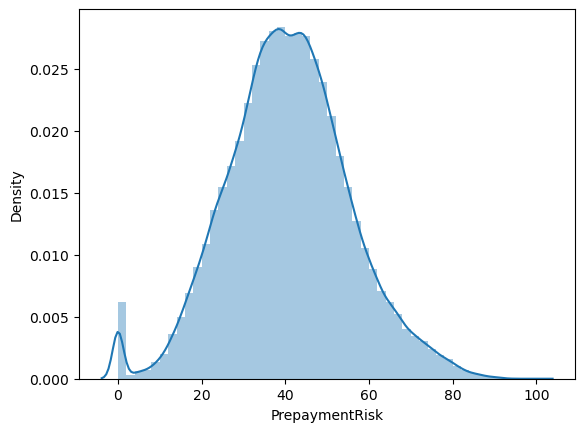

In [56]:
sns.distplot(data['PrepaymentRisk'])

In [57]:
b=(data['PrepaymentRisk']>=(data['PrepaymentRisk'].mean())).value_counts()
b

False    91614
True     89634
Name: PrepaymentRisk, dtype: int64

In [58]:
data.head(15)

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditScoreRange,FirstPaymentMonth,MaturityMonth,LoanDurationYear,LTVRange,RepaymentRange,Prepay,PrepaymentRisk
0,850,0,16974,25,1,1,89,27,117000,89,6.750,3,0,5,2,360,1,0,0,52,4,01,01,5,3,2,22950,41.538462
1,850,0,19740,0,1,1,73,17,109000,73,6.500,2,0,5,1,360,0,0,0,144,4,01,01,5,3,3,14450,26.153846
2,850,0,29940,0,1,1,75,16,88000,75,6.875,3,0,5,1,360,1,0,0,67,4,01,01,5,3,2,13600,24.615385
3,850,0,31084,0,1,1,76,14,160000,76,6.875,2,0,5,1,360,1,0,0,35,4,01,01,5,3,1,11900,21.538462
4,850,0,35644,0,1,1,78,18,109000,78,7.125,2,0,5,1,360,1,0,0,54,4,01,01,5,3,2,15300,27.692308
9,850,1,48620,30,1,1,95,27,35000,95,7.125,3,0,5,2,360,0,1,104,212,4,01,01,5,3,5,22950,41.538462
10,850,0,12060,0,1,1,80,19,126000,80,6.500,3,0,4,2,360,1,0,0,37,4,01,01,5,3,1,16150,29.230769
11,850,0,12060,12,1,1,77,18,200000,77,6.750,2,0,5,0,360,0,0,0,47,4,01,01,5,3,1,15300,27.692308
12,850,0,12060,12,1,1,85,38,70000,85,6.750,3,0,5,2,360,0,0,0,53,4,01,01,5,3,2,32300,58.461538
13,850,0,12060,25,1,1,90,19,93000,90,7.250,3,0,5,1,360,1,0,0,55,4,01,01,5,3,2,16150,29.230769


In [59]:
cormat = data.corr()
round(cormat,2)
cormat.style.background_gradient(cmap='coolwarm') 


,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditScoreRange,LoanDurationYear,LTVRange,RepaymentRange,Prepay,PrepaymentRisk
CreditScore,1.000000,-0.045632,0.021633,-0.218184,0.008352,0.002951,-0.254317,-0.130434,-0.018204,-0.254741,-0.130369,-0.011973,0.010105,-0.061988,0.008610,-0.020528,-0.053382,-0.250769,-0.177140,0.013195,0.948809,-0.018845,-0.157561,0.011830,0.065549,0.065549
FirstTimeHomebuyer,-0.045632,1.000000,-0.026830,0.260390,-0.005665,0.017373,0.252856,0.025174,-0.042612,0.253117,0.032767,-0.099180,0.012695,-0.073901,0.332965,0.015757,-0.085281,0.005427,0.019129,-0.001346,-0.047036,0.015454,0.085633,-0.004956,0.017157,0.017157
MSA,0.021633,-0.026830,1.000000,-0.054188,-0.004397,0.001868,-0.063492,0.021047,0.061339,-0.063021,0.017065,0.016050,0.030172,-0.000164,-0.060022,-0.003812,0.032453,-0.012713,-0.021453,-0.022629,0.022245,-0.004096,-0.035045,-0.022822,0.025426,0.025426
MIP,-0.218184,0.260390,-0.054188,1.000000,-0.031880,0.034209,0.719612,0.121157,0.008826,0.720995,0.128485,-0.030381,-0.047899,-0.020889,0.436633,0.023476,-0.036769,0.067339,0.056271,-0.088086,-0.215227,0.020711,0.208003,-0.087894,0.080150,0.080150
Units,0.008352,-0.005665,-0.004397,-0.031880,1.000000,-0.162727,-0.031039,0.003720,0.036994,-0.030948,0.061934,0.001120,-0.001151,0.036445,-0.016832,0.001526,-0.016771,0.009171,0.000099,0.023599,0.009670,0.000849,-0.003434,0.023406,0.005842,0.005842
Occupancy,0.002951,0.017373,0.001868,0.034209,-0.162727,1.000000,0.040015,0.013028,0.052740,0.040003,-0.155754,-0.011402,-0.005871,-0.052335,0.036316,-0.006847,0.011891,-0.009845,0.000216,-0.024302,0.002823,-0.007734,0.001865,-0.025435,0.013367,0.013367
OCLTV,-0.254317,0.252856,-0.063492,0.719612,-0.031039,0.040015,1.000000,0.143264,0.112211,0.999398,0.107749,-0.021700,-0.028016,-0.014528,0.429678,0.029893,-0.028488,0.069835,0.062753,-0.096510,-0.247739,0.027766,0.686475,-0.097211,0.097060,0.097060
DTI,-0.130434,0.025174,0.021047,0.121157,0.003720,0.013028,0.143264,1.000000,0.090014,0.143025,0.052111,0.040873,-0.042277,-0.000420,0.083339,0.033591,-0.091985,0.047292,0.033571,-0.051742,-0.128964,0.033650,0.083038,-0.053999,0.978283,0.978283
OrigUPB,-0.018204,-0.042612,0.061339,0.008826,0.036994,0.052740,0.112211,0.090014,1.000000,0.111439,-0.119874,0.064770,0.028822,0.094835,0.029883,-0.016088,0.232296,-0.063116,-0.061801,-0.209800,-0.011371,-0.014450,0.147821,-0.213023,0.086717,0.086717
LTV,-0.254741,0.253117,-0.063021,0.720995,-0.030948,0.040003,0.999398,0.143025,0.111439,1.000000,0.108129,-0.021034,-0.027795,-0.013911,0.429528,0.029817,-0.028745,0.070137,0.062938,-0.096870,-0.248159,0.027690,0.686652,-0.097502,0.096739,0.096739


In [60]:
#Now we'll try to find which features are strongly correlated with CreditScore
cormat = cormat['PrepaymentRisk'][:-1]  # -1 because the latest row is SalePrice
golden_features_list = cormat[abs(cormat) > 0.05].sort_values(ascending=False)
print("There are {} strongly correlated values with PrepaymentRisk:\n{}".format(len(golden_features_list), golden_features_list))


There are 13 strongly correlated values with PrepaymentRisk:
Prepay               1.000000
DTI                  0.978283
OCLTV                0.097060
LTV                  0.096739
LoanPurpose          0.086766
OrigUPB              0.086717
MIP                  0.080150
CreditScore          0.065549
CreditScoreRange     0.057354
LTVRange             0.055518
MonthsInRepayment   -0.050094
RepaymentRange      -0.052638
NumBorrowers        -0.104467
Name: PrepaymentRisk, dtype: float64


## Testing the new column efficiency.

In [61]:
X= data[['CreditScore','DTI']]
y=data['PrepaymentRisk']

In [62]:
from sklearn.compose import make_column_transformer

pre_process = make_column_transformer(
    (StandardScaler(), ['CreditScore', 'DTI']),
    remainder='drop'
)

In [63]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2)

# Print the coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 1.064655784877593
Mean Absolute Error: 0.6848409250218509
R-squared Score: 0.9950111863089802
Coefficients: [0.05658558 1.29510216]
Intercept: -40.63113825359012


In [64]:

# Create a ridge regression model with a specified alpha (regularization strength)
ridge_reg = Ridge(alpha=0.5)  # Adjust the value of alpha as needed

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2)

# Print the coefficients and intercept
print("Coefficients:", ridge_reg.coef_)
print("Intercept:", ridge_reg.intercept_)

Mean Squared Error: 1.064655779476965
Mean Absolute Error: 0.6848409395130789
R-squared Score: 0.9950111863342868
Coefficients: [0.05658558 1.29510212]
Intercept: -40.63113633868937


In [65]:
'''
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

# predict
y_pred = rfc.predict(X_test)
importances = pd.DataFrame(data={
    'Name': X_train.columns,
    'Importance': rfc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Name'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()
'''

"\nrfc = RandomForestRegressor()\nrfc.fit(X_train, y_train)\n\n# predict\ny_pred = rfc.predict(X_test)\nimportances = pd.DataFrame(data={\n    'Name': X_train.columns,\n    'Importance': rfc.feature_importances_\n})\nimportances = importances.sort_values(by='Importance', ascending=False)\nplt.bar(x=importances['Name'], height=importances['Importance'])\nplt.title('Feature importances obtained from coefficients')\nplt.xticks(rotation='vertical')\nplt.show()\n"

## Creating pipepline

In [66]:

# Create the Linear Regression model
linear_regression_model = LinearRegression()

# Create the Ridge Regression model with L2 regularization
ridge_regression_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for different levels of regularization

# Create the pipelines
linear_regression_pipeline = make_pipeline(
    pre_process,
    PCA(n_components=0.95),
    MinMaxScaler(),
    linear_regression_model
)

ridge_regression_pipeline = make_pipeline(
    pre_process,
    PCA(n_components=0.95),
    MinMaxScaler(),
    ridge_regression_model
)

# Fit the pipelines to the training data
linear_regression_pipeline.fit(X_train, y_train)
ridge_regression_pipeline.fit(X_train, y_train)

# Make predictions using the trained pipelines
y_pred_linear = linear_regression_pipeline.predict(X_test)
y_pred_ridge = ridge_regression_pipeline.predict(X_test)

# Perform evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("R-squared Score:", r2_linear)

print("\nRidge Regression Metrics:")
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("R-squared Score:", r2_ridge)

# Print the coefficients and intercept for Ridge Regression
print("\nRidge Regression Coefficients:", ridge_regression_model.coef_)
print("Ridge Regression Intercept:", ridge_regression_model.intercept_)

# Print the coefficients and intercept for Linear Regression
print("\nLinear Regression Coefficients:", linear_regression_model.coef_)
print("Linear Regression Intercept:", linear_regression_model.intercept_)



Linear Regression Metrics:
Mean Squared Error: 1.0646557848775935
Mean Absolute Error: 0.6848409250218483
R-squared Score: 0.9950111863089802

Ridge Regression Metrics:
Mean Squared Error: 1.0645996575799286
Mean Absolute Error: 0.6850996705480711
R-squared Score: 0.9950114493128872

Ridge Regression Coefficients: [ 65.59321509 -97.16375356]
Ridge Regression Intercept: 53.136200843156445

Linear Regression Coefficients: [ 65.61768428 -97.21085552]
Linear Regression Intercept: 53.145846311665714


## Saving the linear regression pipeline model.

In [67]:

import pickle
# Specify the file path where you want to save the model
file_path = 'linear_regression_pipeline.pkl'

# Open the file in write mode and save the model using pickle.dump()
with open(file_path, 'wb') as file:
    pickle.dump(linear_regression_pipeline, file)



In [68]:

model=pickle.load(open('linear_regression_pipeline.pkl',"rb"))
score=model.score(X_test,y_test)
print(score*100)


99.50111863089802


In [69]:

ppr = pd.DataFrame({
    "predicted": model.predict(X_test),
    "original": y_test
})

ppr


,predicted,original
72087,37.712297,37.873303
87988,33.097744,33.475113
212341,18.644377,17.647059
83339,49.764315,49.375566
258477,40.610894,40.521267
...,...,...
199279,59.748132,60.597285
247557,35.090972,34.660633
46314,40.465892,40.307692
66089,68.511821,66.696833


## Creating pipeline for random forest model

In [70]:
X_new = data[['CreditScore','FirstTimeHomebuyer','MIP', 'OCLTV','DTI','LTV' ,'OrigInterestRate', 'PPM' ,'OrigLoanTerm' ,'NumBorrowers',
              'MonthsInRepayment','CreditScoreRange','LTVRange','RepaymentRange']]
y_new = data['EverDelinquent']

In [71]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181248 entries, 0 to 291450
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         181248 non-null  int64  
 1   FirstTimeHomebuyer  181248 non-null  int32  
 2   MIP                 181248 non-null  int64  
 3   OCLTV               181248 non-null  int64  
 4   DTI                 181248 non-null  int64  
 5   LTV                 181248 non-null  int64  
 6   OrigInterestRate    181248 non-null  float64
 7   PPM                 181248 non-null  int32  
 8   OrigLoanTerm        181248 non-null  int64  
 9   NumBorrowers        181248 non-null  int32  
 10  MonthsInRepayment   181248 non-null  int64  
 11  CreditScoreRange    181248 non-null  int32  
 12  LTVRange            181248 non-null  int32  
 13  RepaymentRange      181248 non-null  int32  
dtypes: float64(1), int32(6), int64(7)
memory usage: 20.6 MB


In [72]:
from imblearn.over_sampling import SMOTE

smt=SMOTE()# instance of smote
x_smote,y_smote=smt.fit_resample(X_new,y_new)

In [73]:
y_smote.value_counts()

0    146768
1    146768
Name: EverDelinquent, dtype: int64

In [74]:
df_smote_over = pd.concat([pd.DataFrame(x_smote,columns=['CreditScore','FirstTimeHomebuyer','MIP','OCLTV','DTI','LTV','OrigInterestRate','PPM','OrigLoanTerm','NumBorrowers','MonthsInRepayment','CreditScoreRange','LTVRange','RepaymentRange']), pd.DataFrame(y_smote, columns=['EverDelinquent'])], axis=1)

In [75]:
for x in df_smote_over.columns:
    if(x=="OrigInterestRate"):
         continue
    df_smote_over[x]=df_smote_over[x].astype(int)


In [76]:
df=df_smote_over
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293536 entries, 0 to 293535
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         293536 non-null  int32  
 1   FirstTimeHomebuyer  293536 non-null  int32  
 2   MIP                 293536 non-null  int32  
 3   OCLTV               293536 non-null  int32  
 4   DTI                 293536 non-null  int32  
 5   LTV                 293536 non-null  int32  
 6   OrigInterestRate    293536 non-null  float64
 7   PPM                 293536 non-null  int32  
 8   OrigLoanTerm        293536 non-null  int32  
 9   NumBorrowers        293536 non-null  int32  
 10  MonthsInRepayment   293536 non-null  int32  
 11  CreditScoreRange    293536 non-null  int32  
 12  LTVRange            293536 non-null  int32  
 13  RepaymentRange      293536 non-null  int32  
 14  EverDelinquent      293536 non-null  int32  
dtypes: float64(1), int32(14)
memory us

In [77]:
X_s = df.drop("EverDelinquent", axis=1)
y_s = df["EverDelinquent"]

In [78]:
from sklearn.compose import make_column_transformer

pre_process = make_column_transformer(
    ('passthrough', ['CreditScore','FirstTimeHomebuyer','MIP', 'OCLTV','DTI','LTV' ,'OrigInterestRate', 'PPM' ,'OrigLoanTerm' ,'NumBorrowers',
              'MonthsInRepayment','CreditScoreRange','LTVRange','RepaymentRange']),
    remainder='drop'
)

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Create the pipeline with imputer, SMOTE, and Random Forest classifier
rfc_pipeline = ImbPipeline([
    ('passthrough', pre_process),
    ('random_forest', RandomForestClassifier())
])

# Fit the pipeline to the training data
rfc_pipeline.fit(x_train, y_train)

# Predict using the pipeline
y_pred = rfc_pipeline.predict(x_test)

# Check performance
rfc_cross_val_scores = cross_val_score(rfc_pipeline, X_s, y_s, cv=5, scoring='recall')
rfc_accuracy = accuracy_score(y_test, y_pred)

print("Cross-validation scores:", rfc_cross_val_scores)
print("Average cross-validation score:", rfc_cross_val_scores.mean())
print('Random Forest Accuracy score:', accuracy_score(y_test, y_pred))
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.7081488  0.82761558 0.96674957 0.96116373 0.96422975]
Average cross-validation score: 0.8855814837169828
Random Forest Accuracy score: 0.8714314914492063
Roc_auc: 0.8714342817590068
R-squared score: 0.48572542863767176
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     29324
           1       0.87      0.87      0.87     29384

    accuracy                           0.87     58708
   macro avg       0.87      0.87      0.87     58708
weighted avg       0.87      0.87      0.87     58708

Confusion Matrix:
 [[25634  3690]
 [ 3858 25526]]


## Saving the pipeline model.

In [80]:

# Open the file in write mode and save the model using pickle.dump()
file_path = 'rfc_pipeline.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(rfc_pipeline, file)


In [81]:

rfc_pipeline=pickle.load(open('rfc_pipeline.pkl',"rb"))
score=rfc_pipeline.score(X_s,y_s)
print(score*100)


97.41496784040118


In [82]:

ed = pd.DataFrame({
    "predicted": rfc_pipeline.predict(X_s),
    "original": y_s
})

ed


,predicted,original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
293531,1,1
293532,1,1
293533,1,1
293534,1,1


In [83]:
ed['original'].value_counts()

0    146768
1    146768
Name: original, dtype: int64

In [84]:
ed['predicted'].value_counts()

0    146898
1    146638
Name: predicted, dtype: int64

In [85]:
ed['original'].isna().sum()

0